# col_wise_concatination of ib77 and ib97_to_df_ib
1. df_mf_ib77_nn_s  & df_mf_ib97_nn_s  in via pickle
2. Concatenate df77 and df97 to df_mf_ib7797_nn
3. Remove duplicates cols
4. Remove duplicates rows
5. sort by timestamp
6. rename to df_ib
7. Save df_ib to pickle
8. ***Tested df_mf_ib7797_n_s written to pickle as df_ib*** 

In [2]:
# Imports required for Loading, sorting .csx files to create specific data sets ie mrn inbody readings. 
%run ./sys_funcs.py              # loads all the def functions in sys_funcs.py into memory
#import sys_funcs                 # gives access to these def function digitalform that are in memory
from pathlib import Path
import csv
import pandas as pd
import numpy as np
import tkinter as tk
import pickle
from pathlib import Path
import csv
import os
import sys
from datetime import datetime
from datetime import time
from sys_funcs import read_csv_to_array
from sys_funcs import clean_wsl_path
from sys_funcs import array_to_dt_row_dict
from sys_funcs import make_blnk_update_row_dict
from sys_funcs import transpose_csv_to_col_dict
#from sys_funcs import update_values_with_config, get_update_result
from sys_funcs import transfer_updates
from sys_funcs import get_dtv_range
from sys_funcs import universal_import
from sys_funcs import parse_inbody_timestamp
from sys_funcs import build_lut
from sys_funcs import extract_a_column_as_df
from sys_funcs import extract_multicolumns_as_df
from sys_funcs import validate_and_sort_timestamps
from sys_funcs import extract_and_filter_by_time_window
from sys_funcs import read_file_dual_path
from sys_funcs import write_file_dual_path
from sys_funcs import asc_to_csv_cnv
from collections.abc import Mapping
import re
#from sys_funcs import 

In [203]:
# set print rows  This worksheet sets maximum # of rows printed
pd.set_option('display.max_rows', 1000)  # Adjust the number of rows to display
# pd.reset_option('display.max_rows')  
print('print set to 1000 rows max' )

print set to 1000 rows max


## def functions

In [204]:
# def scale_mean_to_one(series):
def scale_mean_to_one(series):
    """Scale a Pandas Series so that its mean becomes 1."""
    mean_val = series.mean()
    return series / mean_val

In [29]:
# def write_df_to_pickle(df, filename):
def write_df_to_pickle(df, filename):
    """
    Writes a DataFrame to a pickle file.

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe to save.
    filename : str
        The pickle filename, e.g. 'mydata.pkl'.
    """
    df.to_pickle(filename)

# usage 
# write_df_to_pickle(df, "df.pkl")


### def functions plotters

#### plot_1col

#usage: plot_1col("df_mf_ib7797_nn_s_mrn", "ECW/TBW")
# def plot_column(df, col_name):
import matplotlib.pyplot as plt

def plot_1col(df, col_name):
    """
    Plot a single column from a dataframe.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the column.
    col_name : str
        The name of the column to plot.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(df[col_name], marker='o', linestyle='-', linewidth=1)
    plt.title(f"{col_name} over index")
    plt.xlabel("Index")
    plt.ylabel(col_name)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [206]:
# plot_1col(df_mf_ib7797_nn_s_mrn, "ECW/TBW")

#### plot_2cols same axis [ ie col & filtered col]

**best plotter with assignable df and dual cols def**

In [210]:
# plot_2cols same axis [ ie col & filtered col]
def plot_2cols(plt_col_a, plt_col_b):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # Ensure timestamp is datetime
    df = df_mf_ib7797_nn_s_mrn.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot first variable
    ax.plot(
        df["timestamp"],
        df[plt_col_a],
        marker="o",
        label=plt_col_a
    )

    # Plot second variable
    ax.plot(
        df["timestamp"],
        df[plt_col_b],
        marker="o",
        label=plt_col_b
    )

    # Minor ticks every day
    ax.xaxis.set_minor_locator(mdates.DayLocator())

    # Major ticks weekly (Mondays)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Grid on major ticks
    ax.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.7)

    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"{plt_col_a} & {plt_col_b} over time")
    plt.legend()
    plt.tight_layout()
    plt.show()


**best plotter with assignable df and dual cols caller**

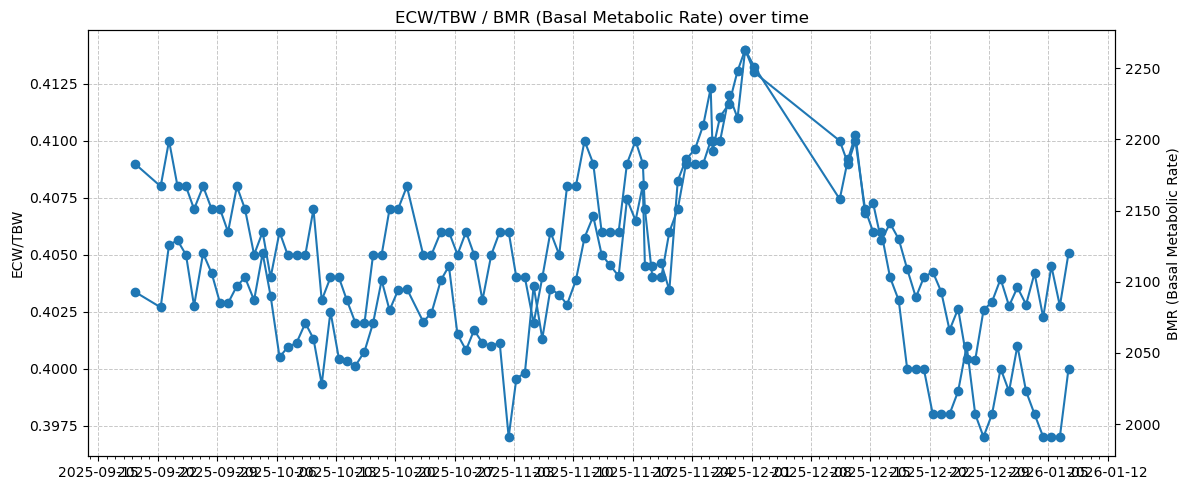

In [209]:
#plt_lst = ['Weight',"ECW/TBW", 'BMR (Basal Metabolic Rate)',"SMM (Skeletal Muscle Mass)",'VFA (Visceral Fat Area)']
plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW", "BMR (Basal Metabolic Rate)")
#plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW")
#plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW", "BMR (Basal Metabolic Rate)","VFA (Visceral Fat Area)")

#### plot_2cols_dual

In [182]:
# usage: plot_2cols_dua("ECW/TBW", "Weight", "BMI", "TBW")
# adds a second y‑axis for the second variable.
def plot_2cols_dual(plt_col_a, plt_col_b):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # Work on a safe copy
    df = df_mf_ib7797_nn_s_mrn.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # First variable (left y-axis)
    ax1.plot(
        df["timestamp"],
        df[plt_col_a],
        marker="o",
        color="tab:blue",
        label=plt_col_a
    )
    ax1.set_ylabel(plt_col_a, color="tab:blue")

    # Second variable (right y-axis)
    ax2 = ax1.twinx()
    ax2.plot(
        df["timestamp"],
        df[plt_col_b],
        marker="o",
        color="tab:red",
        label=plt_col_b
    )
    ax2.set_ylabel(plt_col_b, color="tab:red")

    # Minor ticks every day
    ax1.xaxis.set_minor_locator(mdates.DayLocator())

    # Major ticks weekly (Mondays)
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Grid on major ticks
    ax1.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.7)

    plt.xticks(rotation=45)
    plt.title(f"{plt_col_a} and {plt_col_b} over time")
    plt.tight_layout()
    plt.show()


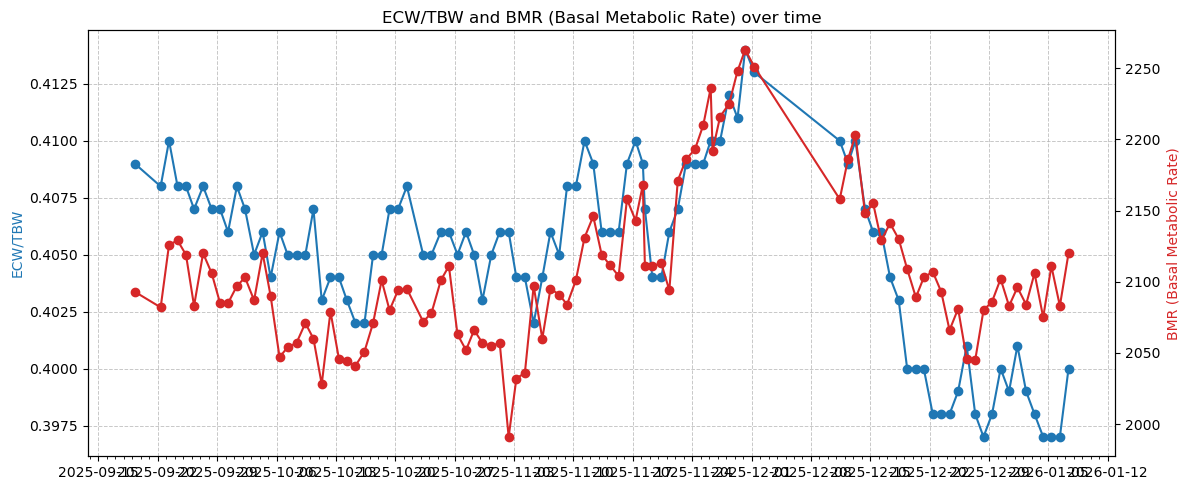

In [183]:
plot_2cols_dual("ECW/TB Go moist this is W", "BMR (Basal Metabolic Rate)")

#### Plot_multi_cols_dual [Individual scalling -- all axis on tr side]

In [184]:
# usage: plot_multi_dual("ECW/TBW", "Weight", "BMI", "TBW")

def plot_multi_same_axis(*cols):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    df = df_mf_ib7797_nn_s_mrn.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    fig, ax = plt.subplots(figsize=(12, 5))

    for col in cols:
        ax.plot(df["timestamp"], df[col], marker="o", label=col)

    # Daily minor ticks
    ax.xaxis.set_minor_locator(mdates.DayLocator())

    # Weekly major ticks
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    ax.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.7)

    plt.xticks(rotation=45)
    plt.title(" / ".join(cols) + " over time")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Reading updated data from Pickle [77 97 & wrkng list]

### Reading updated data from Pickle [df_mf_ib77_nn_s]

In [32]:
# import df_mf_ib77_nn_s  from pickle
df_mf_ib77_nn_s = pd.read_pickle("df_mf_ib77_nn_s.pkl")
# verify df_mf_ib77_nn_s

### Reading updated data from Pickle [df_mf_ib97_nn_s]

In [33]:
# import df_mf_ib77_nn_s  from pickle
df_mf_ib97_nn_s = pd.read_pickle("df_mf_ib97_nn_s.pkl")
# verify df_mf_ib97_nn_s

## Concatenate the two dataframes on timestamp, keeping [["timestamp", "ib_id","ID"] + plt_lst]

### Select the [plt_lst]

In [186]:
# the list of columns you want to include in the analysis and plotting
plt_lst = ["ECW/TBW",
           "BMR (Basal Metabolic Rate)",
           "SMM (Skeletal Muscle Mass)",
           "VFA (Visceral Fat Area)"]
# verify plt_lst

### Read the file created in CoL_wise_import_77 [df_mf_ib77_nn_s] to df77

In [35]:
# read df_mf_ib77_nn_s to df77 
df_mf_ib97_nn_s = pd.read_pickle("df_mf_ib97_nn_s.pkl")
df97 = df_mf_ib97_nn_s
# verify df97

### Read the file created in CoL_wise_import_97 [df_mf_ib97_nn_s] to df97

In [34]:
# read df_mf_ib77_nn_s to df77 
df_mf_ib77_nn_s = pd.read_pickle("df_mf_ib77_nn_s.pkl")
df77 = df_mf_ib77_nn_s
# verify df77.columns

In [189]:
print(" # verify df_mf_ib77_nn_s & # verify df_mf_ib97_nn_s has been LOADED")

 # verify df_mf_ib77_nn_s & # verify df_mf_ib97_nn_s has been LOADED


### Concatenate df77 and df97 to df_ib [formerly df_mf_ib7797_nn]

In [21]:
# calc
df_mf_ib7797_nn = pd.concat([df77, df97], ignore_index=True)
# verify df_mf_ib7797_nn

### Sort "df_mf_ib7797_nn" in order ascending timestamp to "df_mf_ib7797_nn_s"

In [25]:
df_mf_ib7797_nn_s = df_mf_ib7797_nn.sort_values(by="timestamp", ascending=True)
# verify print (df_mf_ib7797_nn_s[["timestamp","ID"] + plt_lst]) 
# verify print (df_mf_ib7797_nn_s[["timestamp","ID"]]) 

### Rename "df_mf_ib7797_nn_s"  to "df_ib" and write to pickle

In [27]:
df_ib = df_mf_ib7797_nn_s
# verify df_ib

###  Write "df_ib" to pickle

In [36]:
# write to pickle
write_df_to_pickle(df_ib, "df_ib.pkl")
# verify 

In [37]:
# This allows the full 77 data frame with columns to sort out for 7797 morning evening ETC
df_ib = df_mf_ib7797_nn_s
df_ib

#write_df_to_pickle(df_mf_ib77_nn_s, "df_mf_ib77_nn_s.pkl")
#print("df_mf_ib77_nn_s written to pickle")
# verify df_mf_ib77_nn_s

,timestamp,dtv,ib_id,cls,cmmnts,Name,ID,Height,Date of Birth,Age,...,Weight_Z score,50kHz-Whole Body Phase Angle_T score,50kHz-Whole Body Phase Angle_Z score,TBW/WT_T Score,TBW/WT_Z Score,SMI(SMM/Wt)_T score,SMI(SMM/Wt)_Z score,ECM/BCM_T Score,ECM/BCM Z Score,delimiter_used
52,2025-09-18 22:44:25,45916,eve,NaN,NaN,bjh970,251201-1,6ft 06.0in,1939.02.23.,86.0,...,2.4,-5.6,-2.6,-1.5,-0.4,-2.0,-0.7,8.0,4.6,","
53,2025-09-19 06:50:43,45917,mrn,NaN,NaN,bjh970,251201-1,6ft 06.0in,1939.02.23.,86.0,...,2.4,-5.4,-2.4,-1.6,-0.5,-2.0,-0.7,7.8,4.4,","
54,2025-09-22 08:14:10,45920,mrn,NaN,NaN,bjh970,251201-1,6ft 06.0in,1939.02.23.,86.0,...,2.3,-5.4,-2.4,-1.6,-0.6,-2.1,-0.8,7.5,4.1,","
55,2025-09-23 07:55:49,45921,mrn,NaN,NaN,bjh970,251201-1,6ft 06.0in,1939.02.23.,86.0,...,2.4,-5.6,-2.6,-1.5,-0.4,-2.0,-0.6,7.6,4.3,","
56,2025-09-23 21:46:03,45921,eve,NaN,NaN,bjh970,251201-1,6ft 06.0in,1939.02.23.,86.0,...,2.5,-5.3,-2.3,-1.6,-0.5,-2.1,-0.8,8.4,5.0,","
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2026-01-05 08:11:07,46025,mrn,NaN,NaN,91725,091725,1939.02.23.,F,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2026-01-05 23:37:32,46025,eve,NaN,NaN,91725,091725,1939.02.23.,F,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2026-01-06 08:11:05,46026,mrn,NaN,NaN,91725,091725,1939.02.23.,F,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2026-01-06 23:19:13,46026,eve,NaN,NaN,91725,091725,1939.02.23.,F,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter for "mrn" & "eve"

In [192]:
# mrn
df_mf_ib7797_nn_s_mrn = df_mf_ib7797_nn_s[df_mf_ib7797_nn_s["ib_id"] == "mrn"]
# verify df_mf_ib7797_nn_s_mrn

In [193]:
# eve
df_mf_ib7797_nn_s_eve = df_mf_ib7797_nn_s[df_mf_ib7797_nn_s["ib_id"] == "eve"]
# verify df_mf_ib7797_nn_s_eve 

## Normalize and Subract 1 on "df_mf_ib7797_nn_s[plt_lst]" col by col

In [194]:
# df_mf_ib7797_nn_s_mrn_n0 = df_mf_ib7797_nn_s_mrn.copy() 
df_mf_ib7797_nn_s_mrn_n0 = df_mf_ib7797_nn_s_mrn.copy() 
# VERIFY df_mf_ib7797_nn_s_mrn_n0

In [195]:
# Calculate normalized 0 mean lists
for plt_col in plt_lst:
    print(" \n Normalized and zero averaged \n", plt_col)
    df_mf_ib7797_nn_s_mrn_n0[plt_col]  =   scale_mean_to_one(df_mf_ib7797_nn_s_mrn[plt_col])-1
    print(df_mf_ib7797_nn_s_mrn_n0[plt_col])
    # plot_column(df_mf_ib7797_nn_s_mrn_n0, plt_col)

 
 Normalized and zero averaged 
 ECW/TBW
53     0.009630
54     0.007161
55     0.012098
57     0.007161
58     0.007161
59     0.004693
60     0.007161
61     0.004693
63     0.004693
64     0.002224
65     0.007161
67     0.004693
69    -0.000244
71     0.002224
72    -0.002713
74     0.002224
75    -0.000244
77    -0.000244
79    -0.000244
81     0.004693
84    -0.005181
86    -0.002713
88    -0.002713
90    -0.005181
92    -0.007650
94    -0.007650
96    -0.000244
98    -0.000244
99     0.004693
101    0.004693
103    0.007161
106   -0.000244
108   -0.000244
110    0.002224
112    0.002224
114   -0.000244
116    0.002224
118   -0.000244
120   -0.005181
122   -0.000244
124    0.002224
126    0.002224
128   -0.002713
130   -0.002713
132   -0.007650
134   -0.002713
136    0.002224
138   -0.000244
140    0.007161
143    0.007161
145    0.012098
147    0.009630
149    0.002224
151    0.002224
153    0.002224
155    0.009630
157    0.012098
159    0.009630
160    0.004693
163   -0.00271

Now plotting: ECW/TBW


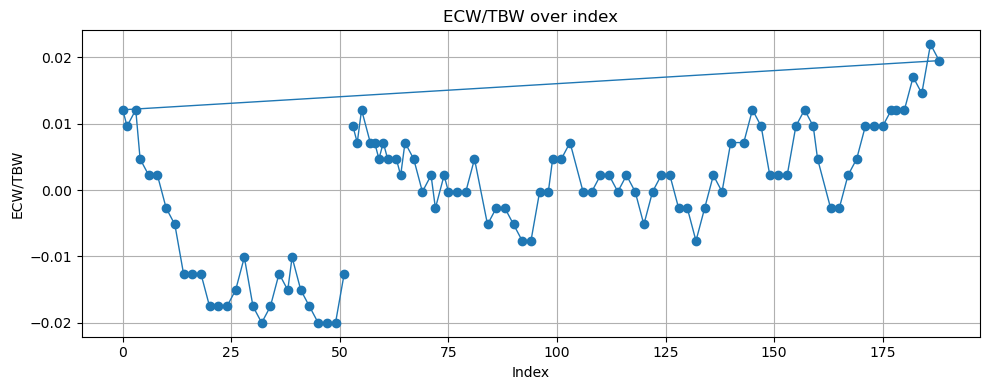

Now plotting: BMR (Basal Metabolic Rate)


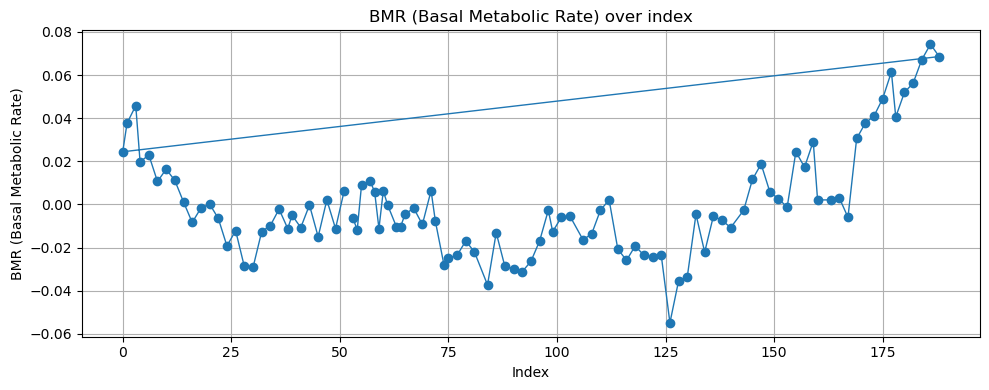

Now plotting: SMM (Skeletal Muscle Mass)


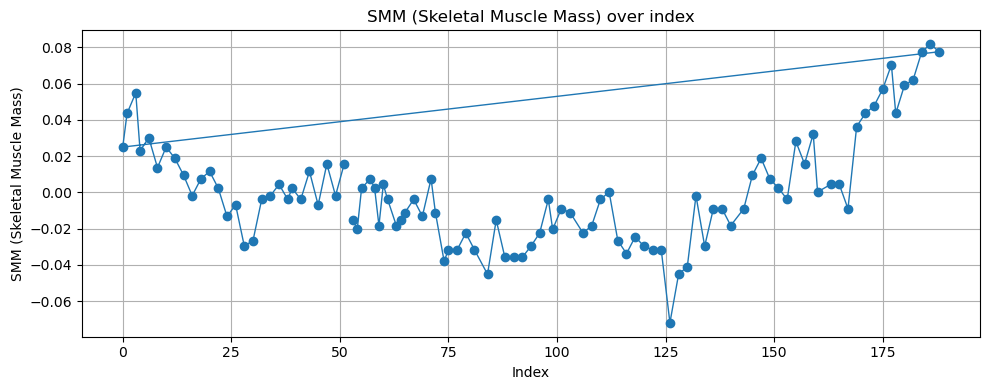

Now plotting: VFA (Visceral Fat Area)


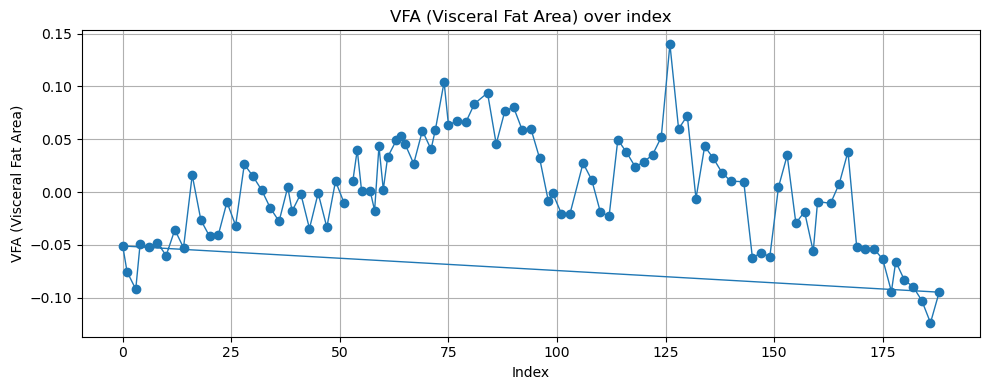

In [196]:
for plt_col in plt_lst:
    print("Now plotting:", plt_col)
    df_mf_ib7797_nn_s_mrn_n0[plt_col]  =   scale_mean_to_one(df_mf_ib7797_nn_s_mrn[plt_col])-1
    plot_column(df_mf_ib7797_nn_s_mrn_n0, plt_col)

# Creating a plot of value using **"df_mf_ib7797_nn_s_mrn"**

In [197]:
# verify df_mf_ib7797_nn_s_mrn

In [198]:
plt_col_a = "ECW/TBW"

In [199]:
plt_col_b = "BMR (Basal Metabolic Rate)"

In [200]:
def plot_multi_dual(df, *cols):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # Work on a safe copy
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    fig, ax = plt.subplots(figsize=(12, 5))

    # First column on left axis
    ax.plot(df["timestamp"], df[cols[0]], marker="o", label=cols[0])
    ax.set_ylabel(cols[0])
    axes = [ax]

    # Additional columns on stacked right axes
    for i, col in enumerate(cols[1:], start=1):
        ax_new = ax.twinx()
        ax_new.spines.right.set_position(("axes", 1 + 0.1 * (i - 1)))
        ax_new.plot(df["timestamp"], df[col], marker="o", label=col)
        ax_new.set_ylabel(col)
        axes.append(ax_new)

    # Minor ticks every day
    ax.xaxis.set_minor_locator(mdates.DayLocator())

    # Major ticks weekly (Mondays)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Grid on major ticks
    ax.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.7)

    plt.xticks(rotation=45)
    plt.title(" / ".join(cols) + " over time")
    plt.tight_layout()
    plt.show()



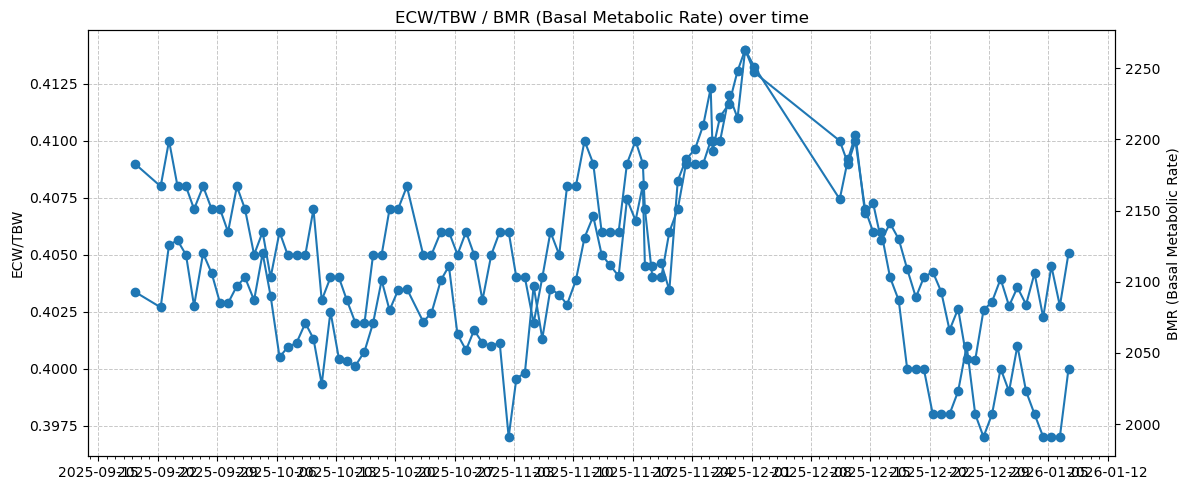

In [202]:
#plt_lst = ['Weight',"ECW/TBW", 'BMR (Basal Metabolic Rate)',"SMM (Skeletal Muscle Mass)",'VFA (Visceral Fat Area)']
plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW", "BMR (Basal Metabolic Rate)")
#plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW")
#plot_multi_dual(df_mf_ib7797_nn_s_mrn, "ECW/TBW", "BMR (Basal Metabolic Rate)","VFA (Visceral Fat Area)")